Starting training...
Iteration 1/1000, Loss: 0.6931
Iteration 100/1000, Loss: 0.5384
Iteration 200/1000, Loss: 0.4503
Iteration 300/1000, Loss: 0.3950
Iteration 400/1000, Loss: 0.3567
Iteration 500/1000, Loss: 0.3285
Iteration 600/1000, Loss: 0.3067
Iteration 700/1000, Loss: 0.2892
Iteration 800/1000, Loss: 0.2748
Iteration 900/1000, Loss: 0.2626
Iteration 1000/1000, Loss: 0.2522
Training completed.

Evaluating on test data:
Accuracy: 0.9668
Precision: 0.9527
Recall: 0.9616
Confusion Matrix:
TP: 55584, FP: 2762
FN: 2220, TN: 89434


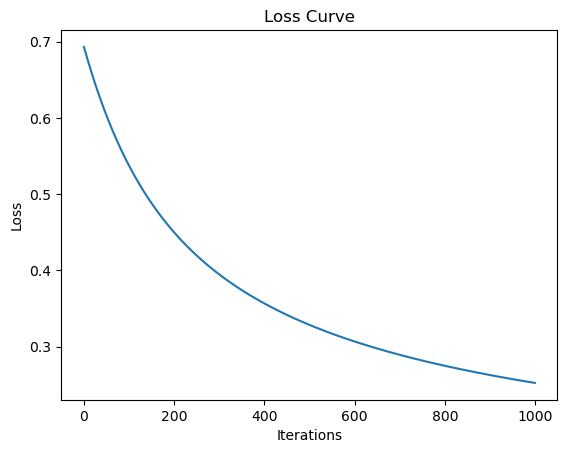

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('synthetic_credit_card_approval.csv')

# Features and target
X = df.drop('Target', axis=1).values
y = df['Target'].values

# Train-test split
np.random.seed(42)
indices = np.arange(X.shape[0])
np.random.shuffle(indices)
train_size = int(0.7 * len(indices))
train_idx, test_idx = indices[:train_size], indices[train_size:]
X_train, X_test = X[train_idx], X[test_idx]
y_train, y_test = y[train_idx], y[test_idx]

# Normalize
X_mean = X_train.mean(axis=0)
X_std = X_train.std(axis=0)
X_train = (X_train - X_mean) / X_std
X_test = (X_test - X_mean) / X_std

# Logistic Regression with logging
class LogisticRegressionScratch:
    def __init__(self, learning_rate=0.01, n_iter=1000):
        self.learning_rate = learning_rate
        self.n_iter = n_iter
        self.losses = []  # Store loss values
    
    def sigmoid(self, z):
        z = np.clip(z, -500, 500)
        return 1 / (1 + np.exp(-z))
    
    def compute_loss(self, y, y_pred):
        m = len(y)
        loss = - (1/m) * np.sum(y * np.log(y_pred + 1e-15) + (1 - y) * np.log(1 - y_pred + 1e-15))
        return loss
    
    def fit(self, X, y):
        self.m, self.n = X.shape
        self.weights = np.zeros(self.n)
        self.bias = 0
        
        print("Starting training...")
        
        for i in range(self.n_iter):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self.sigmoid(linear_model)
            
            loss = self.compute_loss(y, y_predicted)
            self.losses.append(loss)
            
            dw = (1 / self.m) * np.dot(X.T, (y_predicted - y))
            db = (1 / self.m) * np.sum(y_predicted - y)
            
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
            
            if (i + 1) % 100 == 0 or i == 0:
                print(f"Iteration {i+1}/{self.n_iter}, Loss: {loss:.4f}")
        
        print("Training completed.")
    
    def predict_prob(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        return self.sigmoid(linear_model)
    
    def predict(self, X, threshold=0.5):
        probs = self.predict_prob(X)
        return np.where(probs >= threshold, 1, 0)
    
    def plot_loss(self):
        plt.plot(range(self.n_iter), self.losses)
        plt.xlabel("Iterations")
        plt.ylabel("Loss")
        plt.title("Loss Curve")
        plt.show()
    
    def evaluate(self, X, y_true):
        y_pred = self.predict(X)
        
        accuracy = np.mean(y_pred == y_true)
        tp = np.sum((y_true == 1) & (y_pred == 1))
        tn = np.sum((y_true == 0) & (y_pred == 0))
        fp = np.sum((y_true == 0) & (y_pred == 1))
        fn = np.sum((y_true == 1) & (y_pred == 0))
        
        precision = tp / (tp + fp + 1e-15)
        recall = tp / (tp + fn + 1e-15)
        
        print(f"Accuracy: {accuracy:.4f}")
        print(f"Precision: {precision:.4f}")
        print(f"Recall: {recall:.4f}")
        print("Confusion Matrix:")
        print(f"TP: {tp}, FP: {fp}")
        print(f"FN: {fn}, TN: {tn}")

# ------------------------
# Train, evaluate and plot
# ------------------------
model = LogisticRegressionScratch(learning_rate=0.01, n_iter=1000)
model.fit(X_train, y_train)

print("\nEvaluating on test data:")
model.evaluate(X_test, y_test)

# Plot the loss curve
model.plot_loss()
